# Final Analysis

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
en = pd.read_csv('../data/clean_reviews_enriched.csv')
en.head()

,review,rating,date,bank,source,sentiment_label,sentiment_score,keywords,themes,review_clean
0,thank you,5,2025-12-01,CBE,google_play,neutral,0.00,"app, good, best, cbe, bank, nice, like, applic...",Other,thank
1,very good app,5,2025-12-01,CBE,google_play,positive,0.91,"app, good, best, cbe, bank, nice, like, applic...",Other,good app
2,excellent,1,2025-12-01,CBE,google_play,positive,1.00,"app, good, best, cbe, bank, nice, like, applic...",Other,excellent
3,good,5,2025-11-30,CBE,google_play,positive,0.70,"app, good, best, cbe, bank, nice, like, applic...",Other,good
4,CBE ይለያል።,5,2025-11-29,CBE,google_play,neutral,0.00,"app, good, best, cbe, bank, nice, like, applic...",Other,cbe


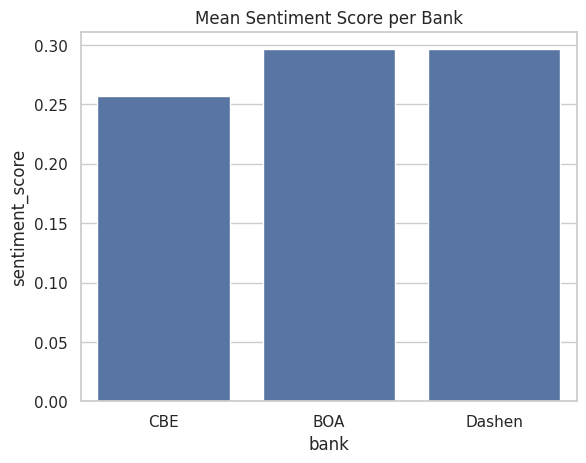

In [17]:
# 1) Mean sentiment per bank
sent_bank = df.groupby('bank', as_index=False)['sentiment_score'].mean().sort_values('sentiment_score')
sns.barplot(data=sent_bank, x='bank', y='sentiment_score')
plt.title('Mean Sentiment Score per Bank')
plt.show()

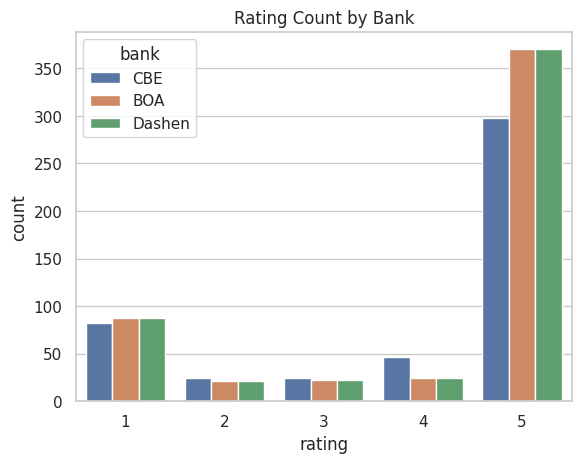

In [18]:
# 2) Ratings by bank
sns.countplot(data=df, x='rating', hue='bank')
plt.title('Rating Count by Bank')
plt.show()

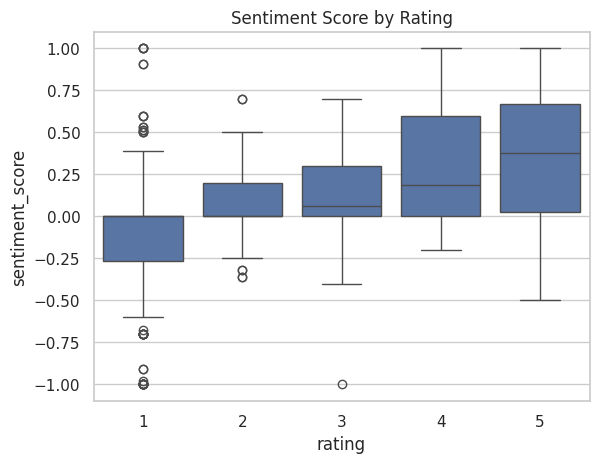

In [19]:
# 3) Sentiment score by rating
sns.boxplot(data=df, x='rating', y='sentiment_score')
plt.title('Sentiment Score by Rating')
plt.show()

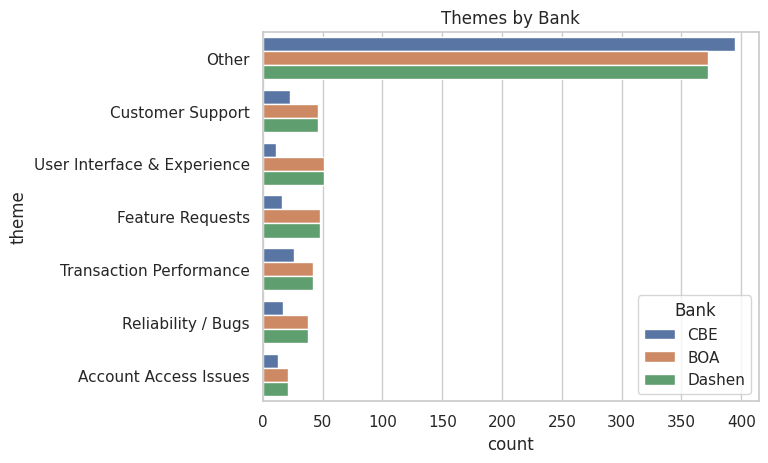

In [20]:
# 4) Theme counts per bank
themes = (df.assign(theme=df['themes'].fillna('Other').str.split(', ')).explode('theme'))
sns.countplot(data=themes, y='theme', hue='bank', order=themes['theme'].value_counts().index)
plt.title('Themes by Bank')
plt.legend(title='Bank')
plt.show()

In [21]:
# 5) Top keywords (as stored) quick view
df.groupby('bank')['keywords'].first()

bank
BOA       app, best, good, dashen, bank, super, banking,...
CBE       app, good, best, cbe, bank, nice, like, applic...
Dashen    app, best, good, dashen, bank, super, banking,...
Name: keywords, dtype: object